# Online Retail


### This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

* Dataset Characteristics - Multivariate, Sequential, Time-Series
* Subject Area - Business
* Associated Tasks - Classification, Clustering
* Feature Type - Integer, Real
* Instances - 541909
* Features - 6

## Additional Information

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Has Missing Values?

No

## Additional Variable Information
* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.	
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides. 

In [157]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
# exporting the data

df = pd.read_excel('Online_Retail_data.xlsx')

In [159]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


* missing values present in the CustomerID column

In [161]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


* We can the negative values in quantity and UnitPrice which is not possible as Quantity & Unit Price of a product can't be Negative 

In [162]:
df.shape

(541909, 8)

* This Dataset has 536641 rows and 8 columns

In [163]:
df.duplicated().sum()

5268

* We have 5268 duplicate values in the dataset

In [164]:
# removing the duplicated values

df = df.drop_duplicates()

In [191]:
# unit price summary

df1 = df.copy()

unitprice_ummary_stats = df1['UnitPrice'].describe()
print(unitprice_ummary_stats)

count    536641.000000
mean          4.632656
std          97.233118
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64


* Min & Max of UnitPrice are 0.001, 8.33, where average is 2.5

In [166]:
quantity_summary_stats = df1['Quantity'].describe()
print(quantity_summary_stats)

count    460251.000000
mean          6.182157
std           6.396944
min           1.000000
25%           1.000000
50%           4.000000
75%          10.000000
max          26.000000
Name: Quantity, dtype: float64


* Min & Max of Quantity are 1, 26, where average is 6.18


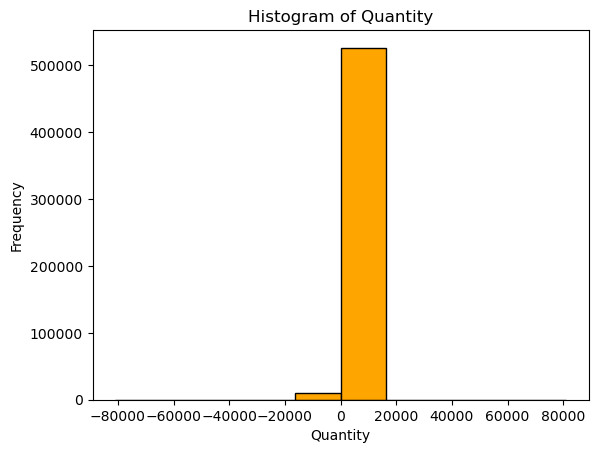

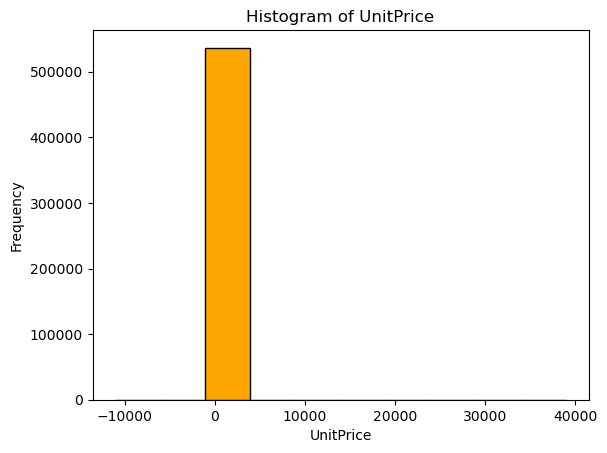

In [167]:
# Let's see how Quantity and UnitPrice is distibuted

columns = ['Quantity','UnitPrice']

for column in columns:
    df[column].plot(kind='hist', edgecolor='k', color='orange')  
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
    

In [168]:
# Removing negative values from Quantities and UnitPrice column

df1 = df.copy()

df1=df1[(df1['Quantity']>0) & (df1['UnitPrice']>0)]



* As we have lots of negative values for Quantities and Unitprice which leads to noisy data so removed those values.

In [169]:
# Cancelled Invoices

df1['InvoiceNo'].apply(str).str.startswith('C').sum()

0

* Once we have deleted the negative values from Quantites & UnitPrice, We don't have any cancelled invoices left  

In [170]:
# SInce CustomerID has missing values and we filling those with 0 for now. 

df1['CustomerID'] = df1['CustomerID'].fillna('0')

In [171]:
# Lets see the info any missing values present

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  object        
 7   Country      524878 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.0+ MB


* Great! Now we don't have any missing values in the dataset

In [172]:
# Count of Unique invoices 

print('Count of Unique invoices:',df1['InvoiceNo'].nunique())

Count of Unique invoices: 19960


In [173]:
# Count of Unique customers 

print('Count of Unique customers:',df1['CustomerID'].nunique())

Count of Unique customers: 4339


In [174]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


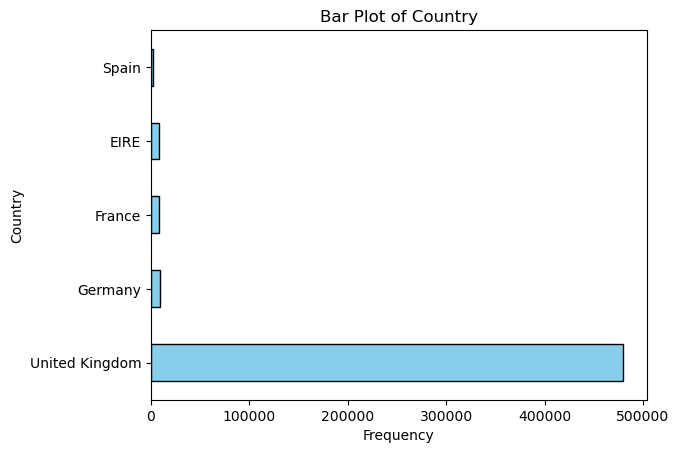

In [175]:
# Country frequency

df1['Country'].value_counts().head(5).plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Country')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.show()

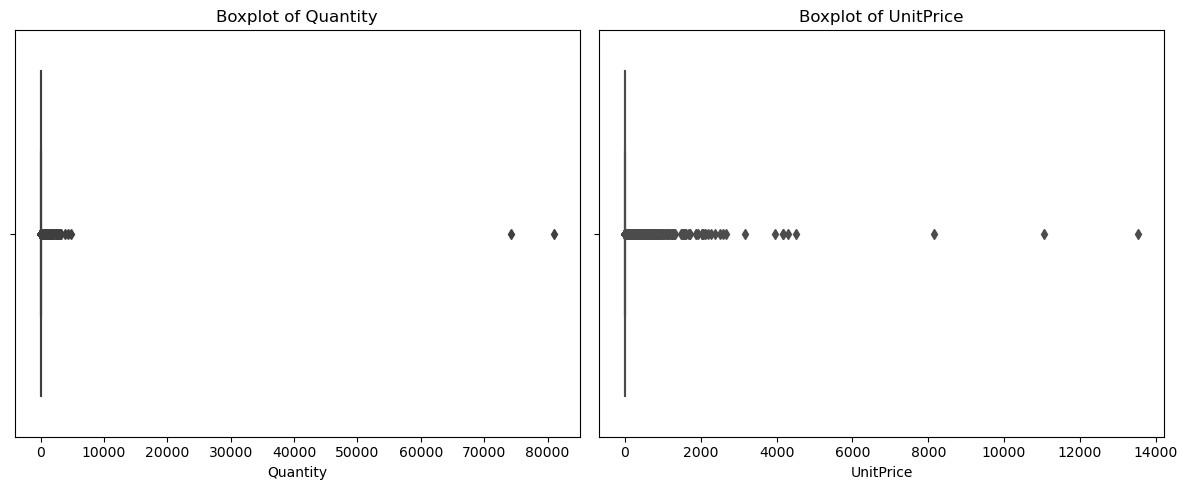

In [176]:
# Checking outliers in dataset

def plot_boxplots(data):
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.boxplot(ax=axes[0], x=df1['Quantity'])
    axes[0].set_title('Boxplot of Quantity')
    
    sns.boxplot(ax=axes[1], x=df1['UnitPrice'], color='orange')
    axes[1].set_title('Boxplot of UnitPrice')
    
    plt.tight_layout()
    plt.show()


plot_boxplots(df1)

In [177]:
print('Dataset shape with outliers: ',df1.shape)

Dataset shape with outliers:  (524878, 8)


In [178]:
# Removing Outliers


q_low = df1["Quantity"].quantile(0.25) # Calculate percentiles
q_hi  = df1["Quantity"].quantile(0.75)

IQR=q_hi-q_low

# Filter out outliers
df1=df1[~((df1['Quantity']<(q_low-1.5*IQR)) | (df1['Quantity']>(q_hi+1.5*IQR)))]

# Calculate percentiles
q_low = df1["UnitPrice"].quantile(0.25)
q_hi  = df1["UnitPrice"].quantile(0.75)

IQR=q_hi-q_low

# Filter out outliers
df1=df1[~((df1['UnitPrice']<(q_low-1.5*IQR)) | (df1['UnitPrice']>(q_hi+1.5*IQR)))]

In [179]:
print('Dataset shape after removing outliers: ',df1.shape)

Dataset shape after removing outliers:  (460251, 8)


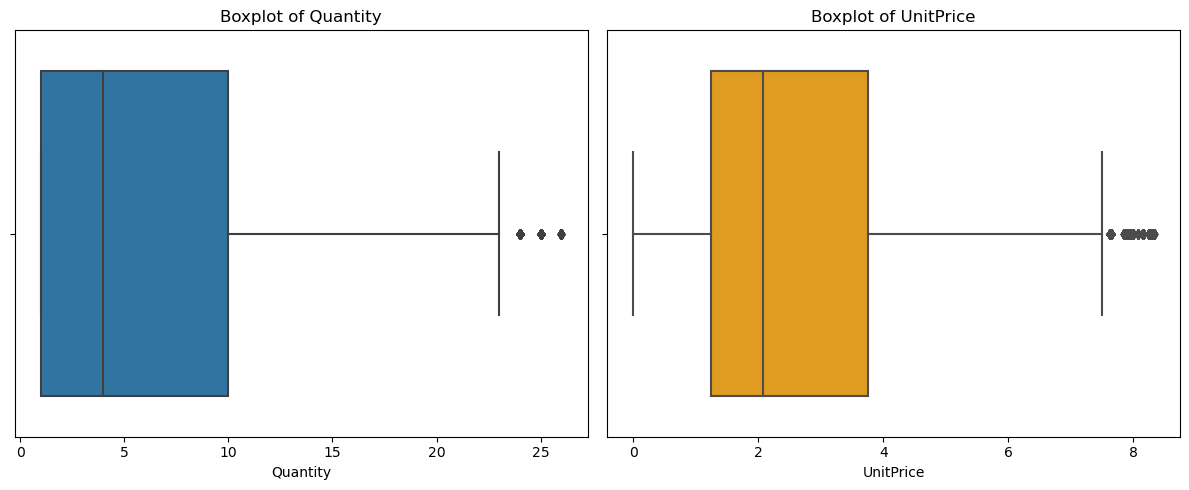

In [180]:
# box plot to visualize after removing the outliers

def plot_boxplots_after_removingoutliers(data):
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.boxplot(ax=axes[0], x=df1['Quantity'])
    axes[0].set_title('Boxplot of Quantity')
    
    sns.boxplot(ax=axes[1], x=df1['UnitPrice'], color='orange')
    axes[1].set_title('Boxplot of UnitPrice')
    
    plt.tight_layout()
    plt.show()


plot_boxplots_after_removingoutliers(df1)

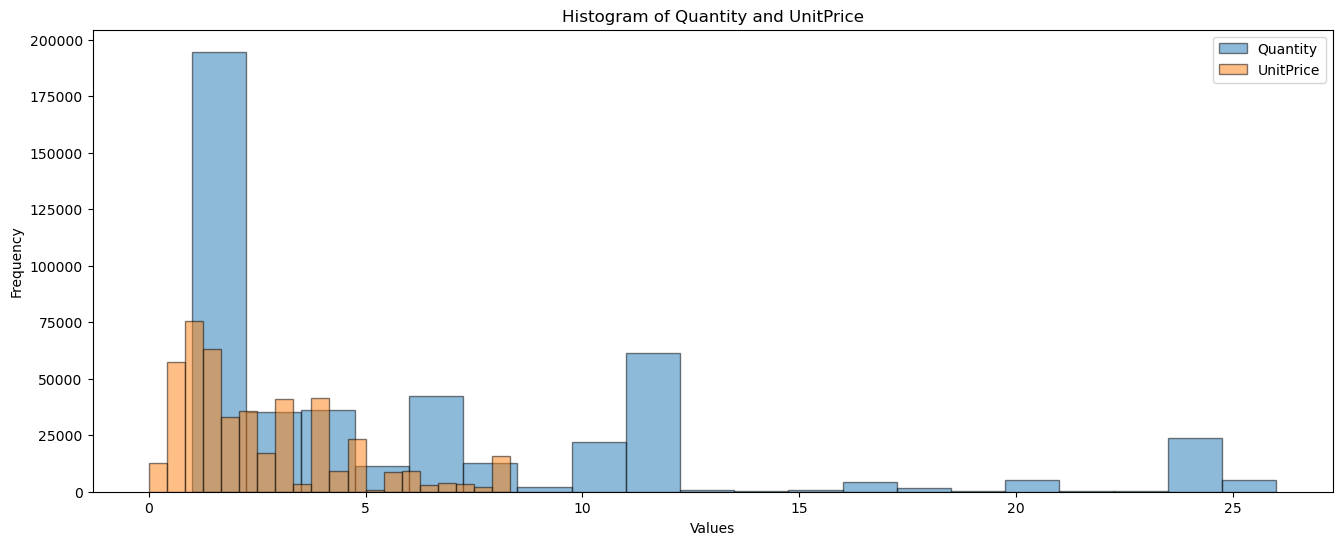

In [181]:
# Let's see how Quantity and UnitPrice is distibuted now

columns = ['Quantity', 'UnitPrice']

plt.figure(figsize=(16, 6))  

for column in columns:
    df1[column].plot(kind='hist', edgecolor='k', alpha=0.5, bins=20, label=column)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity and UnitPrice')
plt.legend()
plt.show()
    

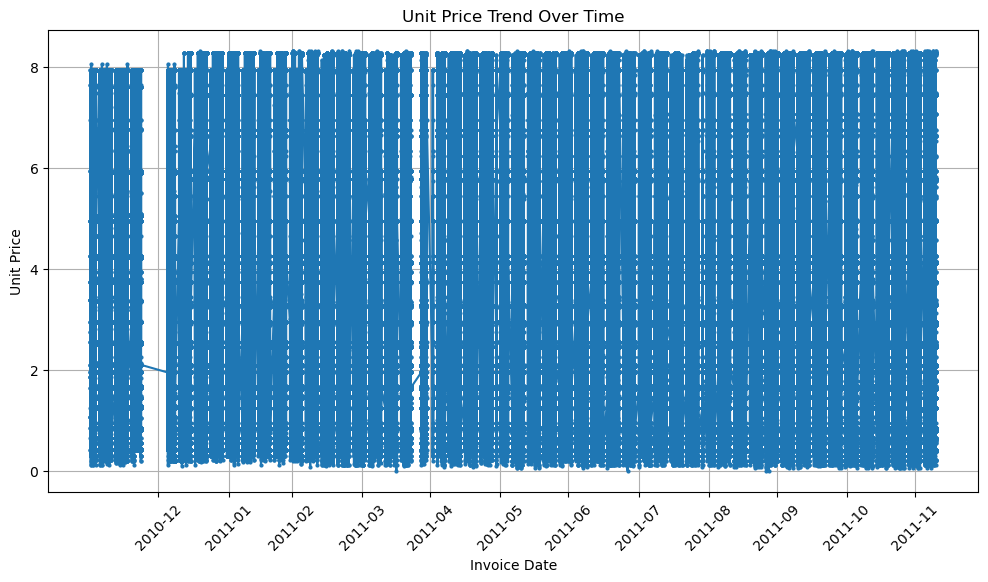

In [182]:
#line plot to visualize the relationship between 'UnitPrice' and 'InvoiceDate'

df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

min_date = df1['InvoiceDate'].min()
max_date = df1['InvoiceDate'].max()
date_sequence = pd.date_range(start=min_date, end=max_date, freq='M')

plt.figure(figsize=(12, 6))
plt.plot(df1['InvoiceDate'], df1['UnitPrice'], marker='o', linestyle='-', markersize=2)
plt.xlabel('Invoice Date')
plt.ylabel('Unit Price')
plt.title('Unit Price Trend Over Time')
plt.xticks(date_sequence, [date.strftime('%Y-%m') for date in date_sequence], rotation=45)
plt.grid(True)
plt.show()

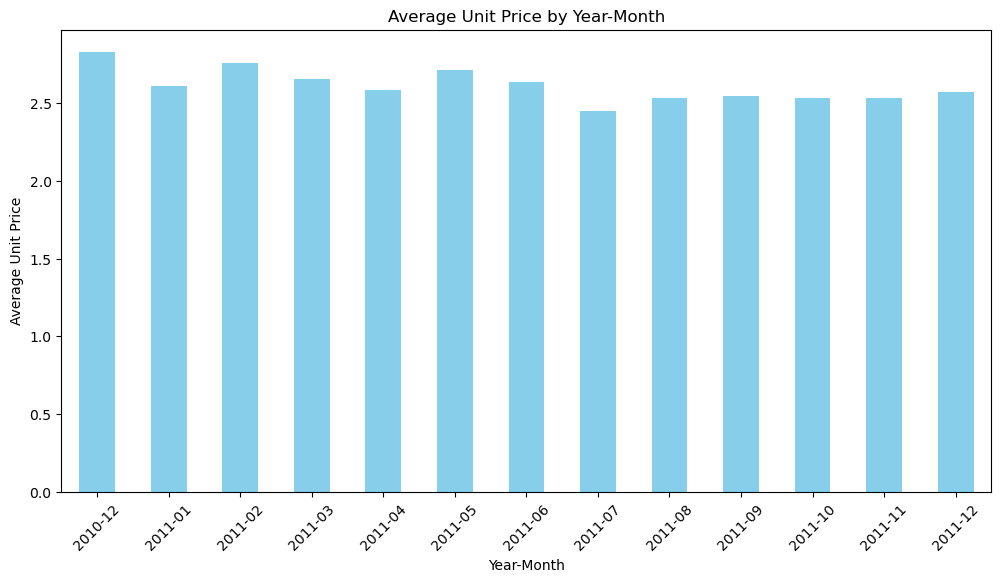

In [183]:
# bar plot to visualize Average Unit price by Year-Month 

plt.figure(figsize=(12, 6))
df1['YearMonth'] = df1['InvoiceDate'].dt.to_period('M')  # new column for Year-Month
avg_unitprice = df1.groupby('YearMonth')['UnitPrice'].mean()
avg_unitprice.plot(kind='bar', color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Average Unit Price')
plt.title('Average Unit Price by Year-Month')
plt.xticks(rotation=45)
plt.show()

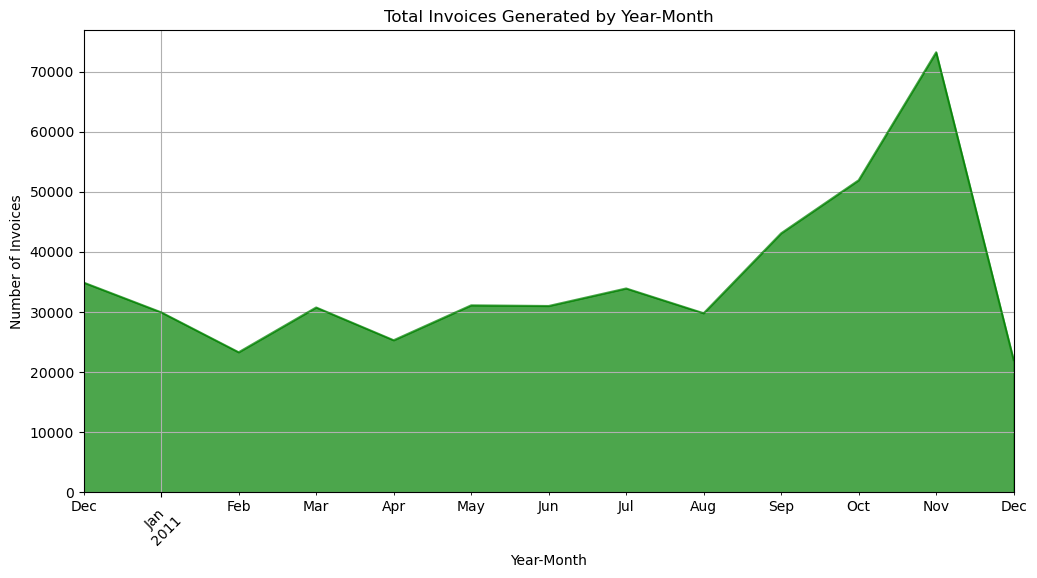

In [184]:
# area plot to visualize total invoice genrated by year-month

plt.figure(figsize=(12, 6))
df1['YearMonth'] = df1['InvoiceDate'].dt.to_period('M')  # new column for Year-Month
number_of_invoices_per_month = df1.groupby('YearMonth')['InvoiceNo'].count()
number_of_invoices_per_month.plot(kind='area', color='green', alpha=0.7)

plt.xlabel('Year-Month')
plt.ylabel('Number of Invoices')
plt.title('Total Invoices Generated by Year-Month')
plt.xticks(rotation=45)
plt.grid(True)  
plt.show()

* As we can see the most profitable month is 2011-11

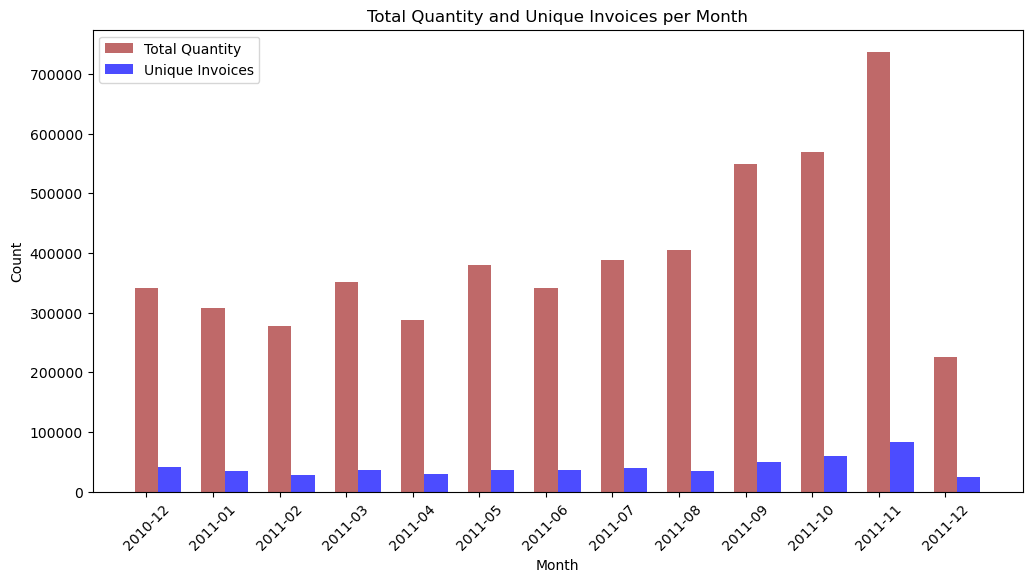

In [185]:
#* total quantity with unique invoice in a month


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by 'YearMonth' and sum the 'quantity' to get the total quantity per month
monthly_total_quantity = df.groupby('YearMonth')['Quantity'].sum()

# Count the unique invoices per month
monthly_unique_invoices = df.groupby('YearMonth')['InvoiceNo'].count()

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = monthly_total_quantity.index.astype(str)
x = range(len(index))

plt.bar(x, monthly_total_quantity, width=bar_width, label='Total Quantity', color='brown', alpha=0.7)
plt.bar([i + bar_width for i in x], monthly_unique_invoices, width=bar_width, label='Unique Invoices', color='blue', alpha=0.7)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Total Quantity and Unique Invoices per Month')
plt.xticks(x, index, rotation=45)
plt.legend()
plt.show()

* so this plot shows all the unique Invoice number with total quantites sold in a month

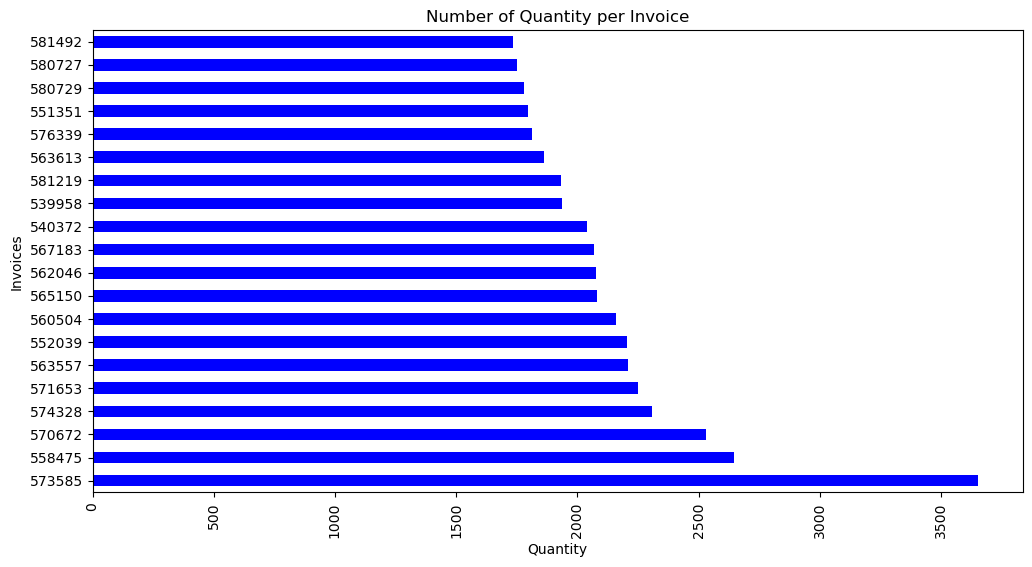

In [186]:
#* total quantity per invoice

plt.figure(figsize=(12, 6))
quantity_per_invoice_count = df1.groupby('InvoiceNo')['Quantity'].sum().nlargest(20)
quantity_per_invoice_count.plot(kind='barh', color='blue')
plt.xlabel('Quantity')
plt.ylabel('Invoices')
plt.title('Number of Quantity per Invoice')
plt.xticks(rotation=90)
plt.show()

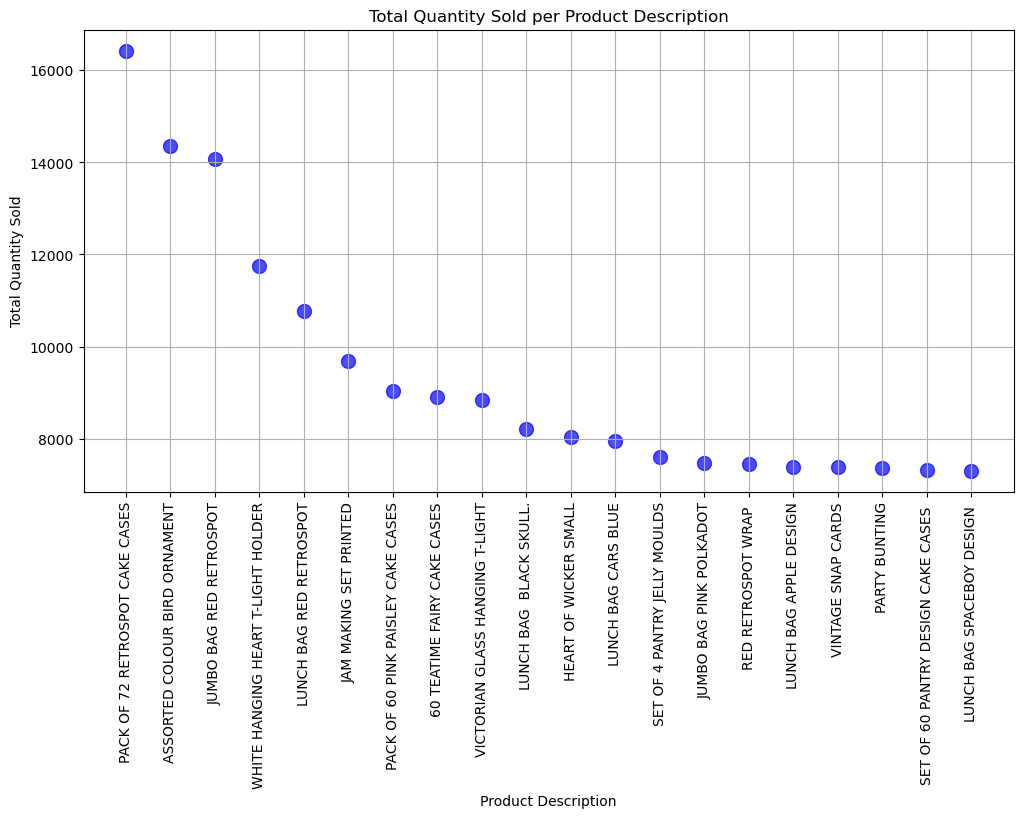

In [187]:
# scatter plot to visualize Number of Quantity sold per Product

plt.figure(figsize=(12, 6))
quantity_per_count = df1.groupby('Description')['Quantity'].sum().nlargest(20)
plt.scatter(quantity_per_count.index, quantity_per_count.values, color='blue', marker='o', s=100, alpha=0.7)

plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold per Product Description')
plt.xticks(rotation=90)
plt.grid(True)  
plt.show()


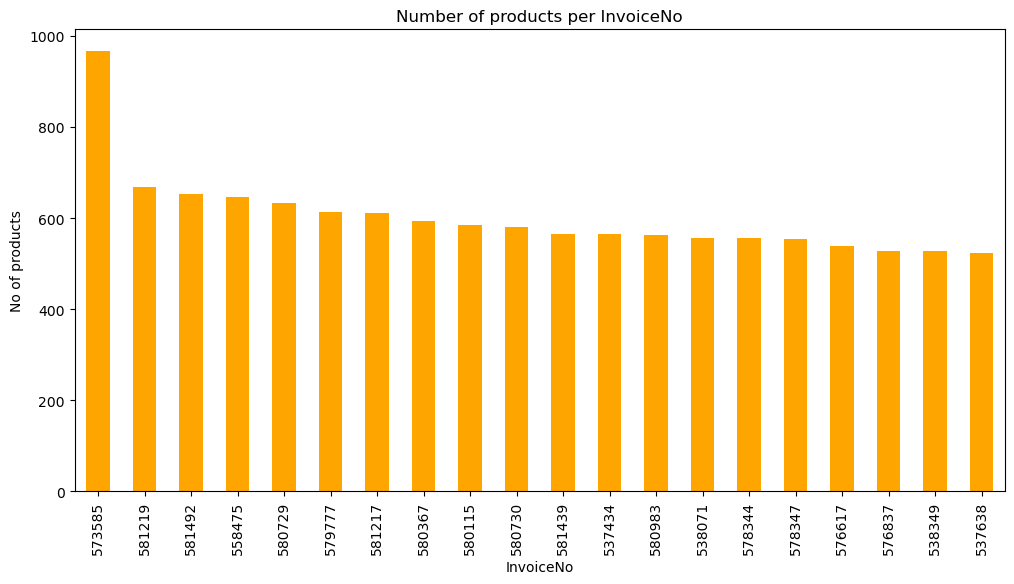

In [188]:
# bar plot to visualize Number of products per InvoiceNo

plt.figure(figsize=(12, 6))
customer_count = df1.groupby('InvoiceNo')['Description'].count().nlargest(20)
customer_count.plot(kind='bar', color='orange')
plt.xlabel('InvoiceNo')
plt.ylabel('No of products')
plt.title('Number of products per InvoiceNo')
plt.xticks(rotation=90)
plt.show()



* There are 18276 unique invoices but showing only top 20 invoices which has highest number of products

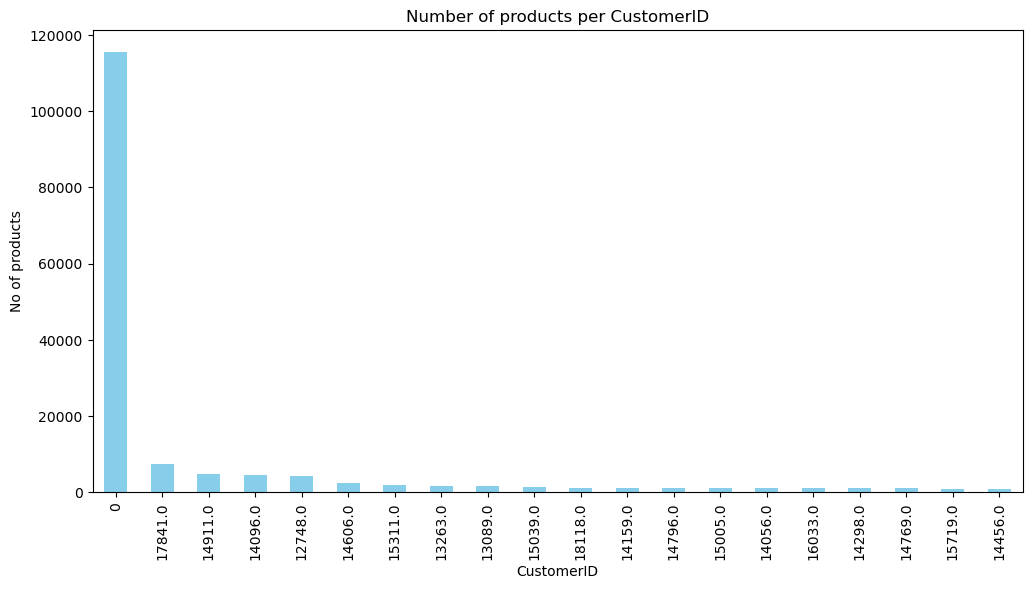

In [189]:
# bar plot to visualize Number of products per CustomerID

plt.figure(figsize=(12, 6))
product_count = df1.groupby('CustomerID')['Description'].count().nlargest(20)
product_count.plot(kind='bar', color='skyblue')
plt.xlabel('CustomerID')
plt.ylabel('No of products')
plt.title('Number of products per CustomerID')
plt.xticks(rotation=90)
plt.show()



**Note**: Please refer 0 as Unknown CustomerID
* Top 20 CustomerID with highest number of product purchased

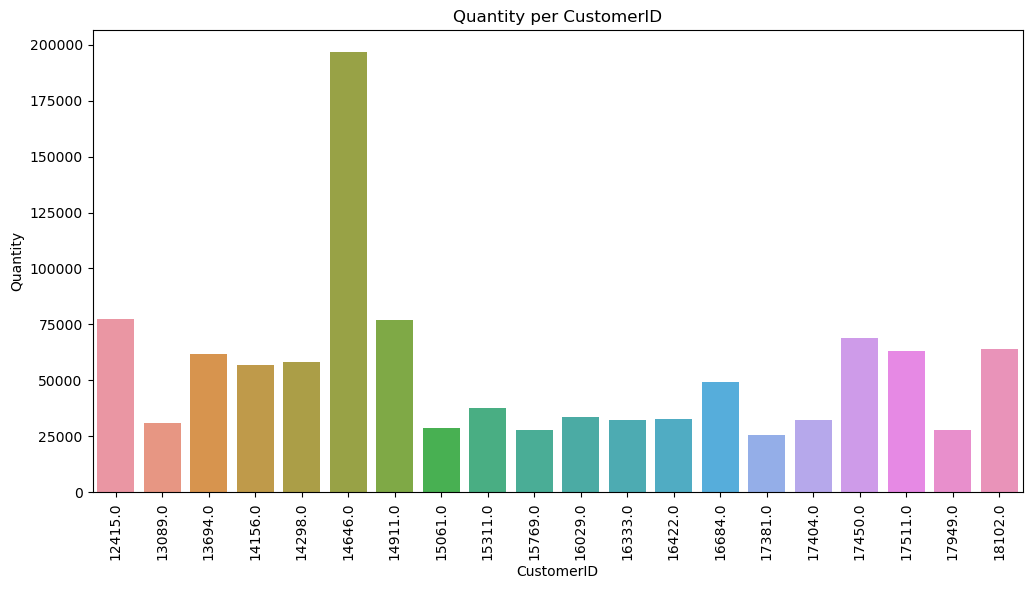

In [190]:
# bar plot to visualize Quantity per CustomerID

top_CustomerID_quantity = df.groupby('CustomerID')['Quantity'].sum().nlargest(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_CustomerID_quantity.index, y=top_CustomerID_quantity.values)
plt.xticks(rotation=90)
plt.title("Quantity per CustomerID")
plt.xlabel("CustomerID")
plt.ylabel("Quantity")
plt.show()